In [12]:
import pandas as pd
import numpy as np
import nltk
import wordcloud
import datetime
import sys
import os
from nltk.stem import WordNetLemmatizer
sys.path.append(os.path.abspath(os.path.join('..'))) # Adding racine path of project to sys.path
from src.preprocessing import *
from src.visualization import *
from nltk.corpus import stopwords, words
import warnings
from pandarallel import pandarallel

warnings.filterwarnings('ignore')


In [13]:
df2 = preprocess2('../data/df1.csv')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 845770 entries, 2020-06-05 14:30:54+00:00 to 2011-05-12 04:00:00+00:00
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   headline         845770 non-null  object
 1   url              845770 non-null  object
 2   publisher        845770 non-null  object
 3   stock            845770 non-null  object
 4   headline_length  845770 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.7+ MB


,headline,url,publisher,stock,headline_length
date,,,,,
2020-06-05 14:30:54+00:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
2020-06-03 14:45:20+00:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2020-05-26 08:30:07+00:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
2020-05-22 16:45:06+00:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
2020-05-22 15:38:59+00:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


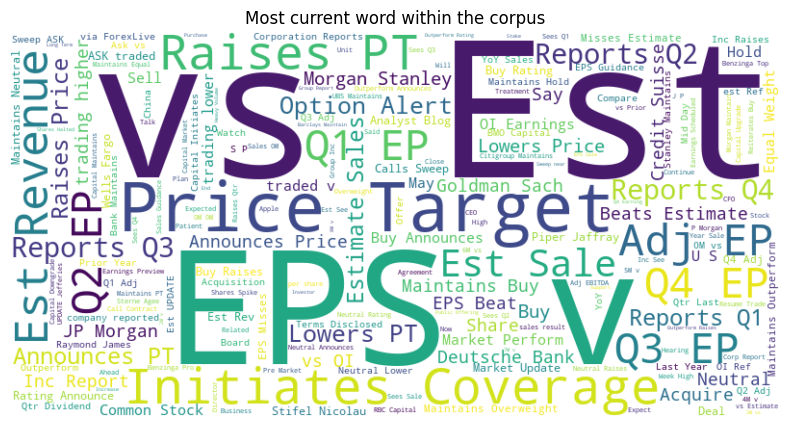

In [14]:
# Let's generate a wordcloud in order to see most current words
word_cloud(df2['headline'], 'Most current word within the corpus')

In [15]:
doc = df2['headline'].sample(1)
doc.values[0]

'United Community Banks /GA Reports Q1 EPS $0.15 vs $0.13 Est; Revenues $58.8M May Not Compare vs $70.07M Est'

### Stop words

In [16]:
stop_words = set(stopwords.words('english'))

### English words

In [17]:
eng_words = [i.lower() for i in words.words()]
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i)for i in eng_words]

### infos about entire corpus

In [18]:
full_doc = " ".join(df2['headline'].values)
len(full_doc)

66365332

In [19]:
# preprocessing on the corpus
corpus = process_text1(full_doc)
display_tokens_info(corpus)

nb tokens 8702194, nb tokens unique 175662


In [20]:
# Values_counts
tmp = pd.Series(corpus).value_counts()
tmp

vs         160439
est        139766
eps        124036
reports    103641
sales       74606
            ...  
$145.29         1
$191.69         1
$191.10         1
$219.25         1
$186.58         1
Name: count, Length: 175662, dtype: int64

In [21]:
rare_tokens = tmp[tmp==1] # We considered as rare token those occured once in the corpus
rare_tokens = list(rare_tokens.index)
len(rare_tokens)

87247

In [22]:
# df2['headline_cleaned'] = df2['headline'].apply(lambda x: process_text2(text=x, eng_words=eng_words_lem))